In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# DATA EXPLORATION

In [5]:
# Checking the data

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Data dimensions

df.shape

# Data has 7043 rows and 21 columns

(7043, 21)

In [7]:
# Data types 

df.info()

# Data has 21 columns with most of them being categorical and 
# only three columns (Senior Citizen, Monthly charges and tenure) are numerical


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# CHECKING FOR SPECIAL CHARACTERS IN ALL COLUMNS:

for col in df.columns:
    unique_values = df[col].unique()
    print(f'Unique values of {col} are {unique_values}')

Unique values of customerID are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values of gender are ['Female' 'Male']
Unique values of SeniorCitizen are [0 1]
Unique values of Partner are ['Yes' 'No']
Unique values of Dependents are ['No' 'Yes']
Unique values of tenure are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values of PhoneService are ['No' 'Yes']
Unique values of MultipleLines are ['No phone service' 'No' 'Yes']
Unique values of InternetService are ['DSL' 'Fiber optic' 'No']
Unique values of OnlineSecurity are ['No' 'Yes' 'No internet service']
Unique values of OnlineBackup are ['Yes' 'No' 'No internet service']
Unique values of DeviceProtection are ['No' 'Yes' 'No internet service']
Unique values of TechSupport are ['No' 'Yes' 'No internet service'

In [15]:
# Converting Total Charges to a float data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [16]:
# Checking for successful conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# DATA CLEANSING

In [17]:
# CHECKING FOR NULL VALUES

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Total Charges column has 11 null values, we will replace them with mean of the Total Charges

In [20]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [21]:
# Checking for successfully replacement for Total Charges

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# DUPLICATE VALUES

In [23]:
df.duplicated().sum()

0

In [ ]:
# There are no duplicate values in the dataset

In [24]:
# conversion of target variable in numerical

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# VISUALISATION OF DATA

In [31]:
import matplotlib.ticker as mtick

In [ ]:

# Demographics - Let us first understand the gender, age range, patner and dependent status of the customers


# GENDER DISTRIBUTION FOR DATA

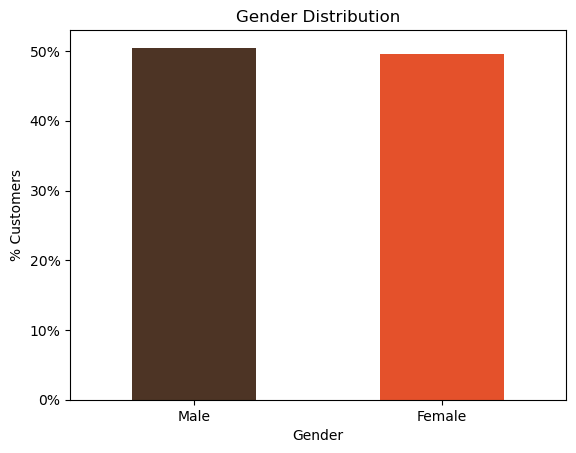

In [39]:
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')
plt.show()



# This shows equivalent distributuon of customers, both male and female customers in dataset are about 50%

Text(0.5, 1.0, 'Percent of Senior Citizens')

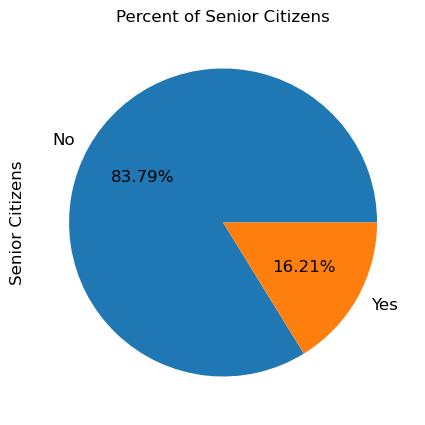

In [55]:
# AGE RANGE WHETHER SENIOR CITIZEN OR NOT


ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.2f%%', labels = ['No', 'Yes'],
                                                           figsize =(5,5), fontsize = 12 )
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('Percent of Senior Citizens', fontsize = 12)


# Only 16% of the total data are Senior Citizens

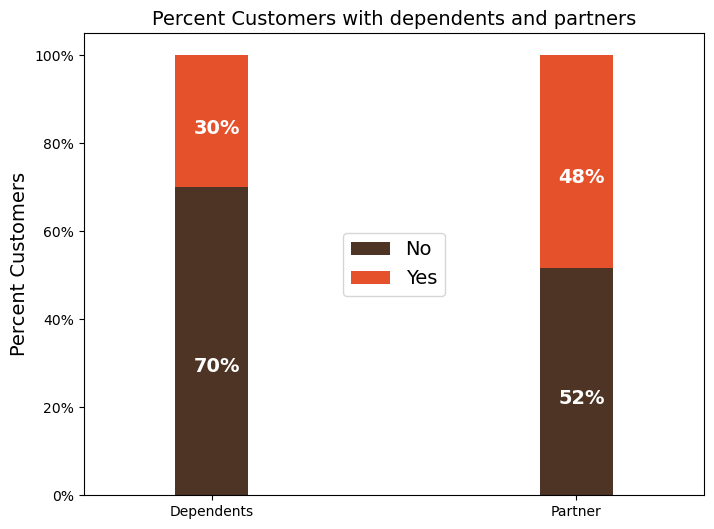

In [67]:
# 1. To visualise the partner and dependent features, we are melting the data into variables and values 
# with respect to another column
# 2. This functions converts the columns into rows and adds a new column value to it indicating whether the customer
# has dependent or variable and gives the output as yes or no
# 3. The melted dataframe is unstacked to count the number of customers having dependents and partners 

df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Percent Customers',size = 14)
ax.set_xlabel('')
ax.set_title('Percent Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [ ]:
# PLOTTING THE NUMBER OF DEPENDENTS AND PARTNERS WITH COUNT OF CUSTOMERS

In [122]:
df4 = df.groupby(['Partner', 'Dependents'])['customerID'].count()
df4

Partner  Dependents
No       No            3280
         Yes            361
Yes      No            1653
         Yes           1749
Name: customerID, dtype: int64

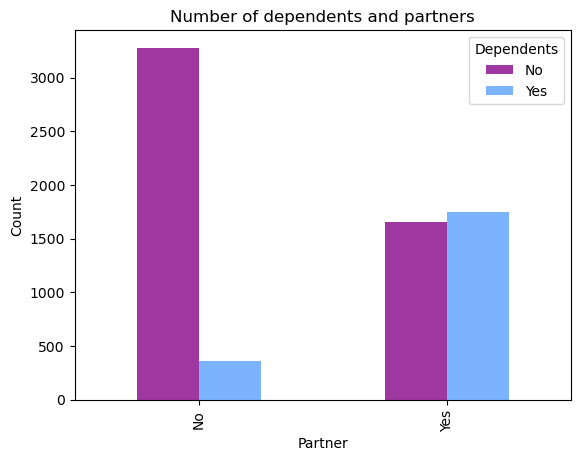

In [149]:
colors = ['#9e379f','#7bb3ff']
ax = df4.unstack().plot(kind = 'bar', color = colors)
plt.ylabel("Count")
plt.title('Number of dependents and partners')
plt.show()




# INSIGHTS

# 70% of customers have dependents 
# 52% of customers have partners


# For customers having partners there are equal number of customers having dependents or not having dependents
# For Customers not having any partners,  most of them do not have dependents as well

In [125]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Analysing Customer Account

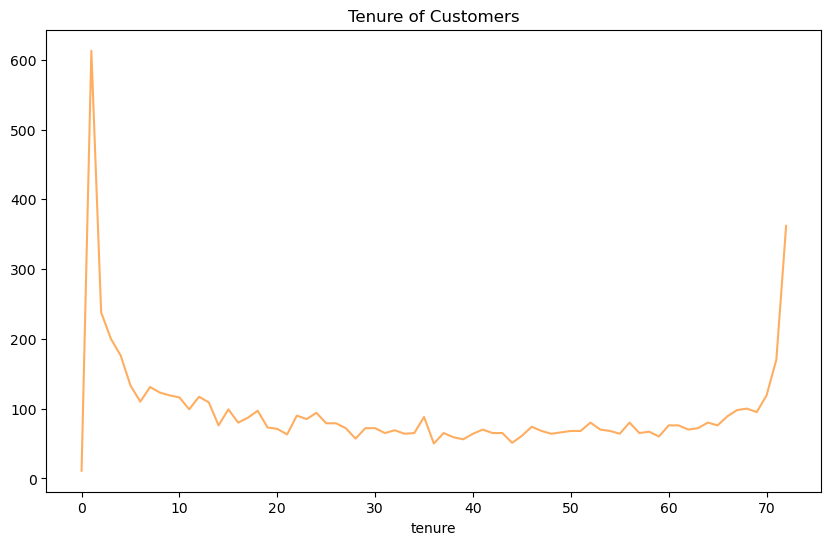

In [138]:
# Tenure of customer

df.groupby('tenure')['customerID'].count().plot(kind = 'line', figsize = (10,6), color = '#ffad60')
plt.title('Tenure of Customers')
plt.show()

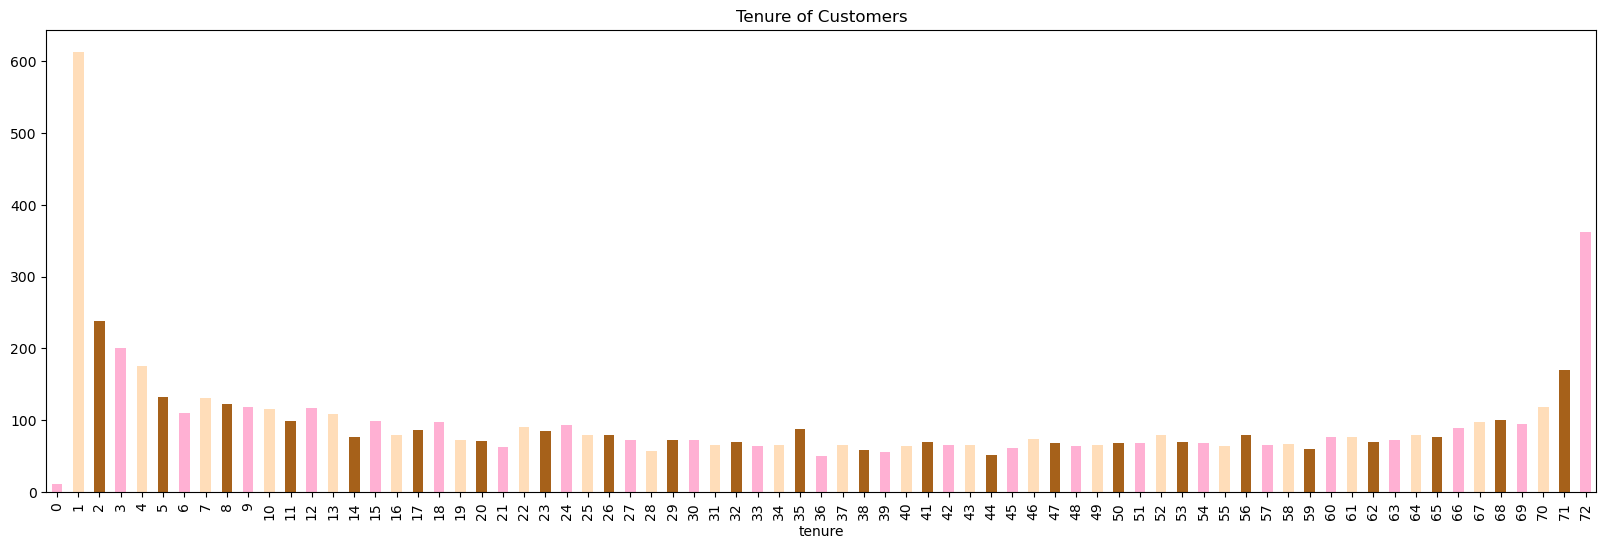

In [148]:
df.groupby('tenure')['customerID'].count().plot(kind = 'bar', figsize = (20,6), color = ['#ffb0d3','#ffddb9','#a6611a'])
plt.title('Tenure of Customers')
plt.show()

In [ ]:
# Visualising the tenure in different plot types indicates over 600 customers have been around only for 1 month, while 
#the next highest is 72 months which is about 6 years

# Phone service of customers

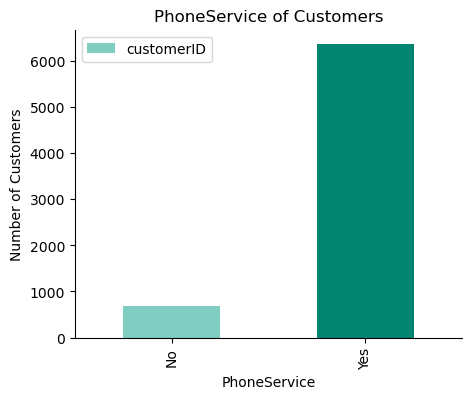

In [168]:
ax = df.groupby('PhoneService')['customerID'].count().plot(kind = 'bar', figsize = (5,4), color = ['#80cdc1','#018571'])
plt.title('PhoneService of Customers')
plt.ylabel("Number of Customers")
ax.spines[['right', 'top']].set_visible(False)
plt.show()

# 90% of customers have Phone service while 10% did not have phone service

# MULTIPLE PHONE LINE SERVICES AT HOME

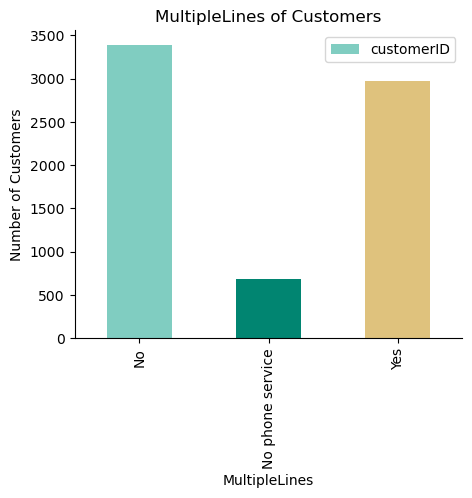

In [170]:
ax = df.groupby('MultipleLines')['customerID'].count().plot(kind = 'bar', figsize = (5,4), color = ['#80cdc1','#018571','#dfc27d'])
plt.title('MultipleLines of Customers')
plt.ylabel("Number of Customers")
ax.spines[['right', 'top']].set_visible(False)
plt.show()


# Around 45% of customers had only one phone line
# Around 40% of customers had multiple phone lines 
# Only 6% of customers did not have any phone lines at all

In [174]:
500/7200

0.06944444444444445

# INTERNET SERVICE ACTIVE OR NOT 

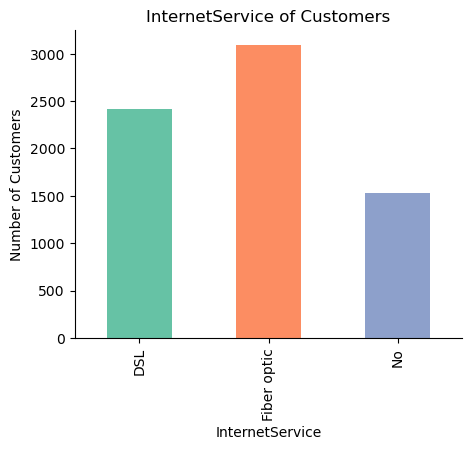

In [176]:
ax = df.groupby('InternetService')['customerID'].count().plot(kind = 'bar', figsize = (5,4), color = ['#66c2a5','#fc8d62','#8da0cb'])
plt.title('InternetService of Customers')
plt.ylabel("Number of Customers")
ax.spines[['right', 'top']].set_visible(False)
plt.show()

# 40% of the customers have Fibre Optic internet connections
# while 35% of customers have DSL connectivity only
# Interesting part is where 21% of customers do not have any Internet service at all

# ANALYSIS OF AGE AND INTERNET SERVICE

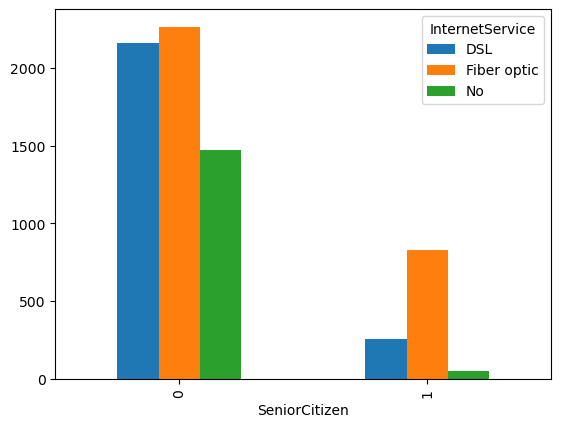

In [187]:
df5 = df.groupby(['SeniorCitizen', 'InternetService'])['customerID'].count()
df5.unstack().plot(kind = 'bar')
plt.show()

# Interestingly, though Senior citizens comprise of only 16% of the total customer base, most of them have 
# fast internet kind of fiber optic whilst very few senior citizen have not opted for NO INTERNET

# This indicates the usage of internet is not directly correlated to age and even senior citizens use internet as 
# much as other age groups

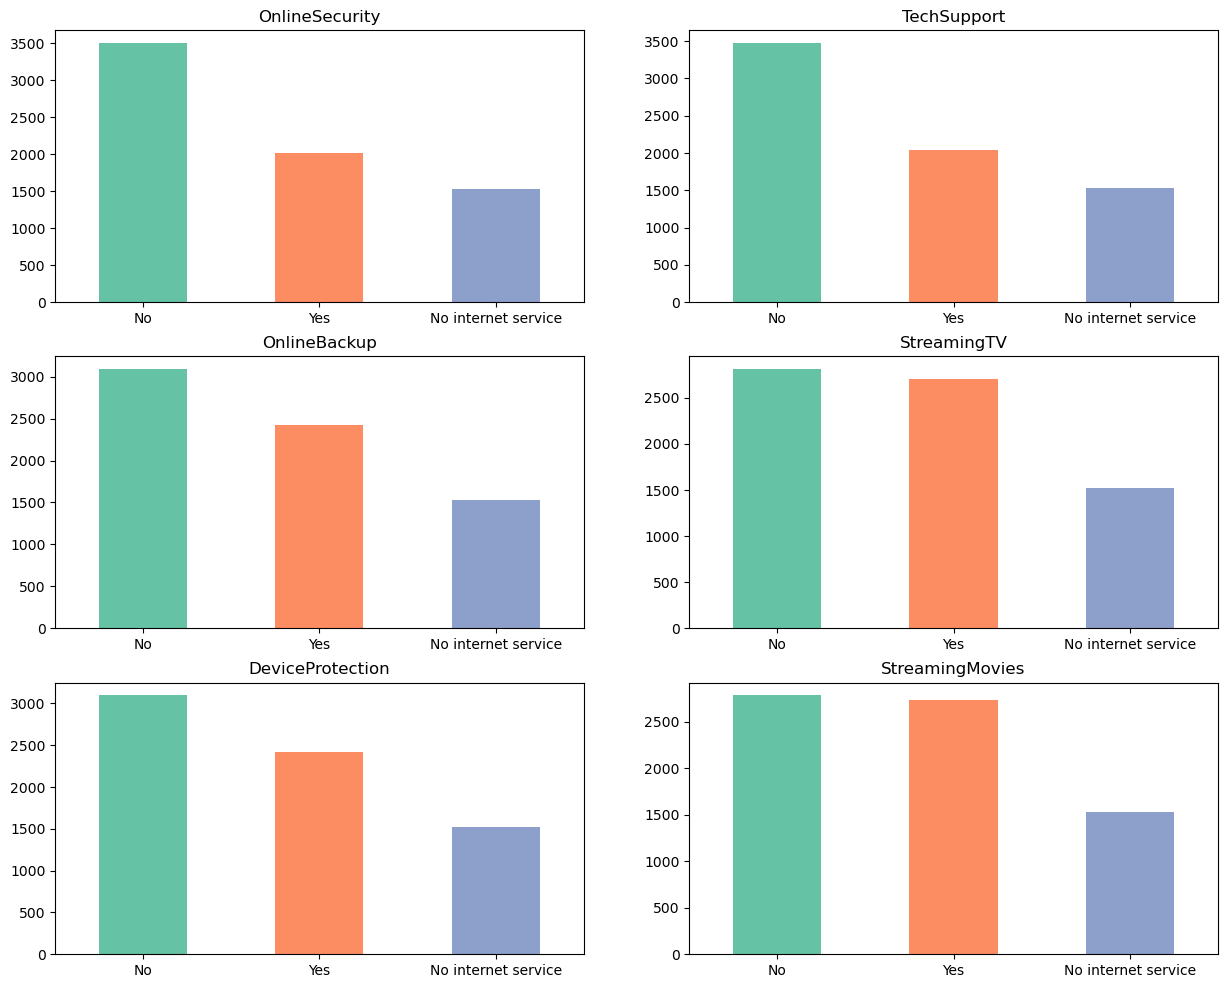

In [224]:
services = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color = ['#66c2a5','#fc8d62','#8da0cb'])
        
    elif i <6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color = ['#66c2a5','#fc8d62','#8da0cb'])
    ax.set_title(item)
    

In [ ]:
# INSIGHTS

# 1. 40-50% of customers did not have Online backup, Device protection, 
# Online security, Tech Suport, Streaming tv, Streaming movies

# 2. 20% of customers do not have internet service at all 



# CONTRACT TYPE AND CUSTOMERS

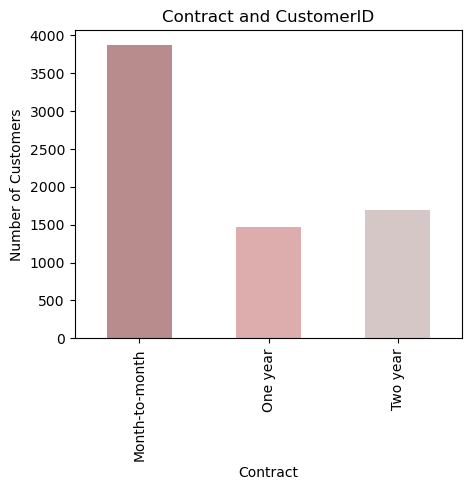

In [229]:
ax = df.groupby('Contract')['customerID'].count().plot(kind = 'bar', figsize = (5,4), color = ['#b88c8c','#ddadad','#d6c7c7'])
plt.title('Contract and CustomerID')
plt.ylabel("Number of Customers")
plt.show()

# 55% of customers are on month on month contract while 20-23% of customers are on One year and two year contract

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_19062/3640848901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_19062/3640848901.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

Text(0.5, 1.0, 'Two Year Contract')

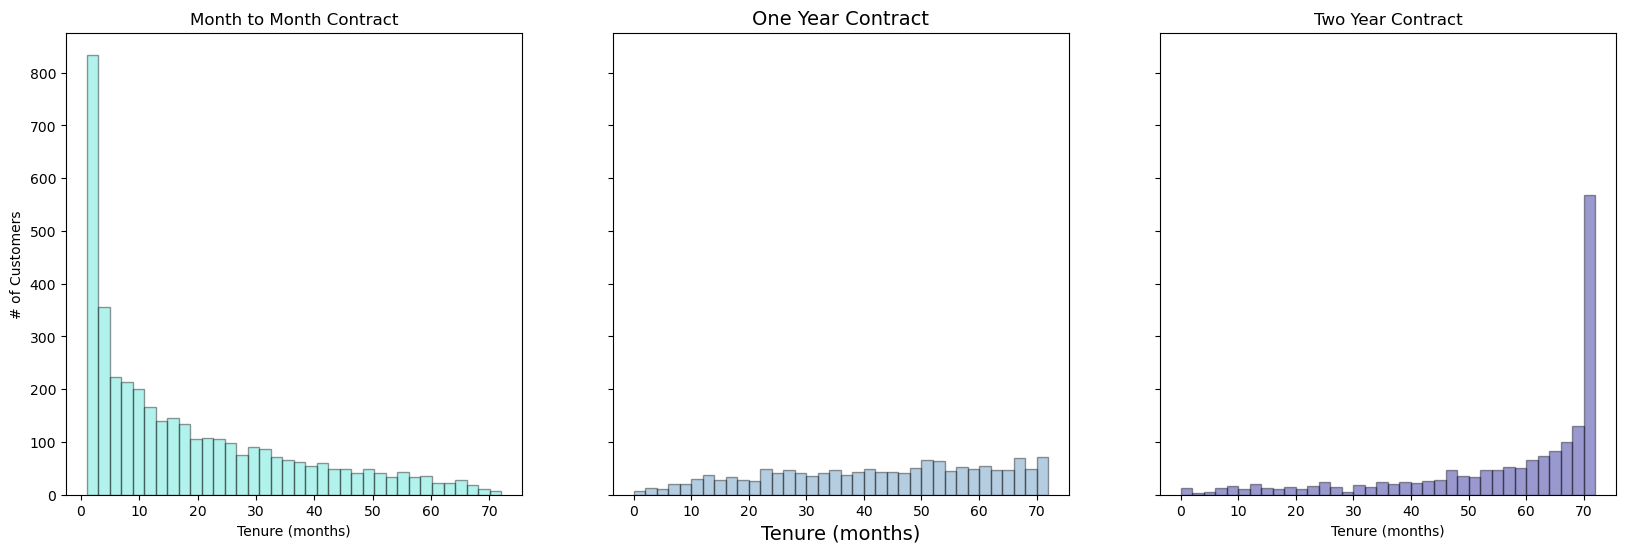

In [274]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                    kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

In [ ]:
df[]

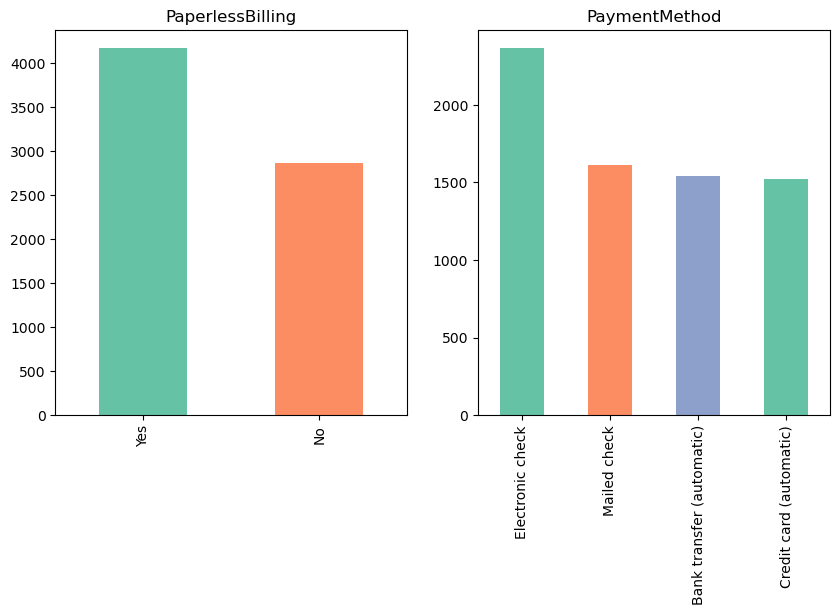

In [307]:
money = ['PaperlessBilling','PaymentMethod']

fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
for i, item in enumerate(money):
     ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i],rot = 90, color = ['#66c2a5','#fc8d62','#8da0cb'])
     ax.set_title(item)
plt.show()


# INSIGHTS

# 1. 57% of customers chose paperless billing
# 2. The most popular payment method is electronic check followed by mailed check
# 3. Surpisingly bank transfer and credit card (automatic) contribute only to 40% of the total payment methods


# MONTHLY and TOTAL CHARGES AND CUSTOMERS

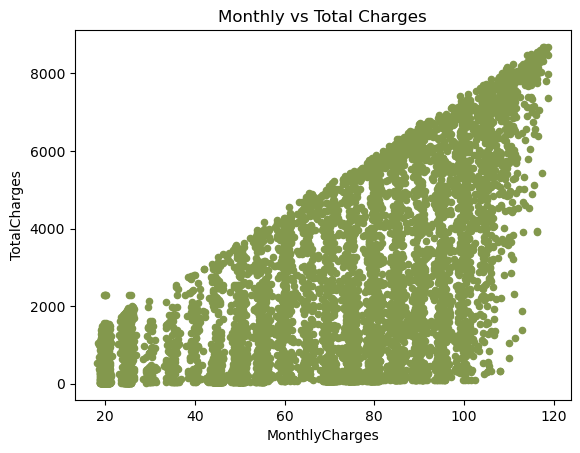

In [321]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges', color = '#83984d')
plt.title('Monthly vs Total Charges')
plt.show()

# We can see that as Monthly Charges increase there is direct increase in total charges

In [ ]:
# GETTING THE CHURN OF TOTAL CUSTOMERS

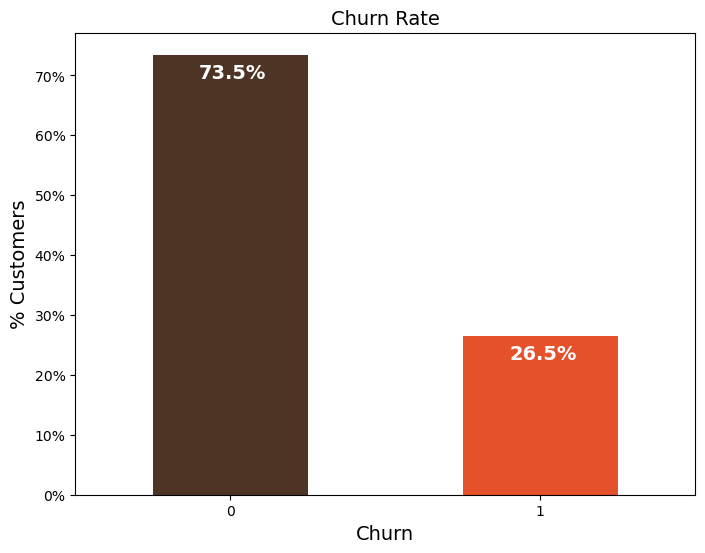

In [324]:
colors = ['#4D3425','#E4512B']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,
                                                      color = colors,figsize = (8,6))
                                                                          
                                                                          
                                                                         
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            color='white',
           weight = 'bold',
           size = 14)

In [ ]:
# INSIGHTS

# The Churn rate is 73.5% for no and only 26.5% for Yes
# There is huge class imbalance and the skewness needs to be addressed

# CHURN VS TENURE

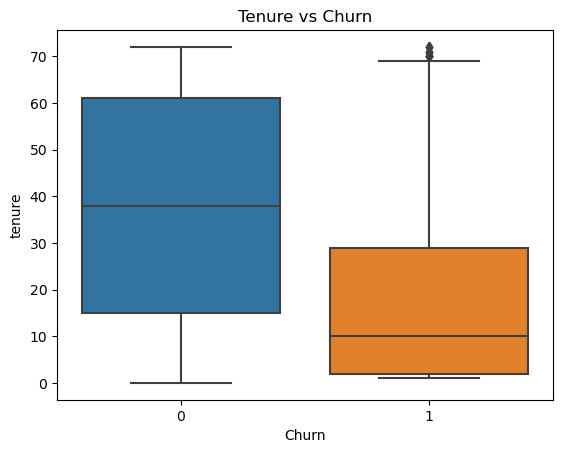

In [328]:
sns.boxplot(x = df.Churn, y =df.tenure)
plt.title("Tenure vs Churn")
plt.show()

# Customers who do not churn stay longer with the company as against those who stay shorter

# CHURN VS CONTRACT

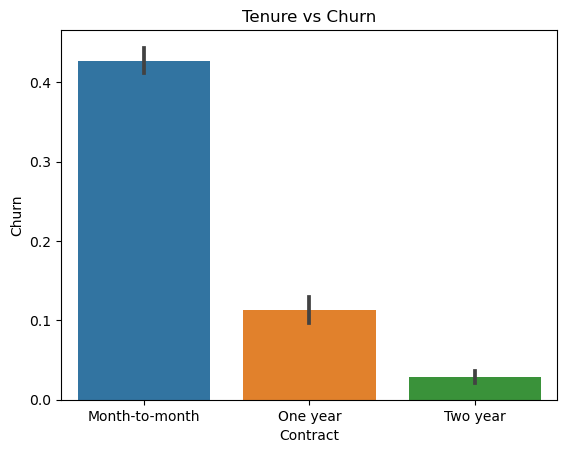

In [337]:
sns.barplot(x = df.Contract, y =df.Churn)
plt.title("Tenure vs Churn")
plt.show()


# Month on Month customers churn a lot more than two year tenure customers
# The longer contract customers tend to stay on
# Churn rate is higher in. month on month contract

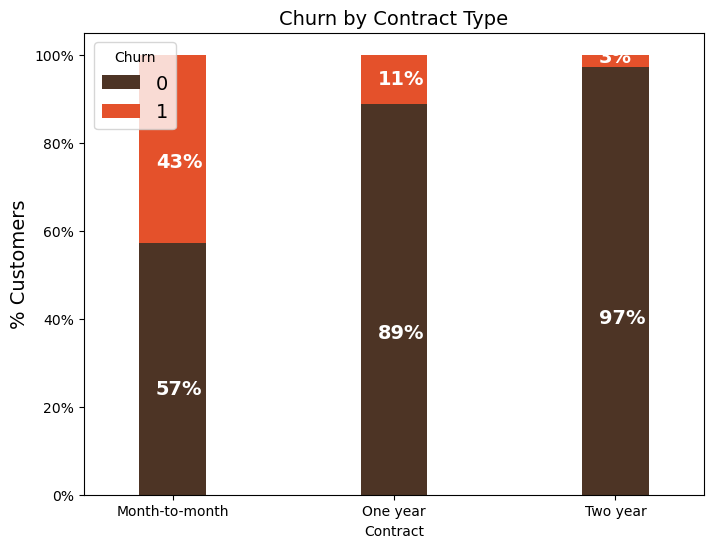

In [340]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [ ]:
# The data indicates that those on two year contact have the lowest churn rate of 3%
# and those on month on month have a higher churn rate of 43%

# CHURN BY AGE

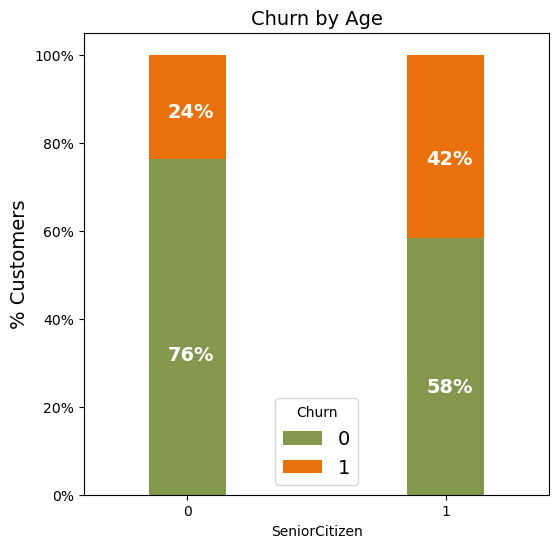

In [345]:
colors = ['#83984d','#ea700b']
age_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (age_churn.T*100.0 / age_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (6,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Age',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

# CHURN BY PAYMENT METHOD

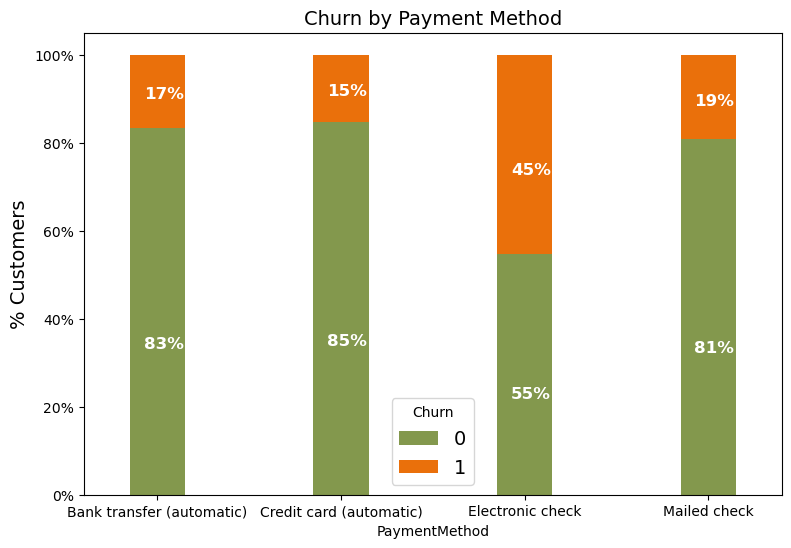

In [350]:
colors = ['#83984d','#ea700b']
paymentmethod_churn = df.groupby(['PaymentMethod','Churn']).size().unstack()

ax = (paymentmethod_churn.T*100.0 / paymentmethod_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (9,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Payment Method',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 12)
    
    # Churn rate was highest with those paying electronically and lowest in automatic transfers

# MONTHLY PAYMENTS AND CHURN RATE


Text(0.5, 1.0, 'Churn by Monthly Charges')

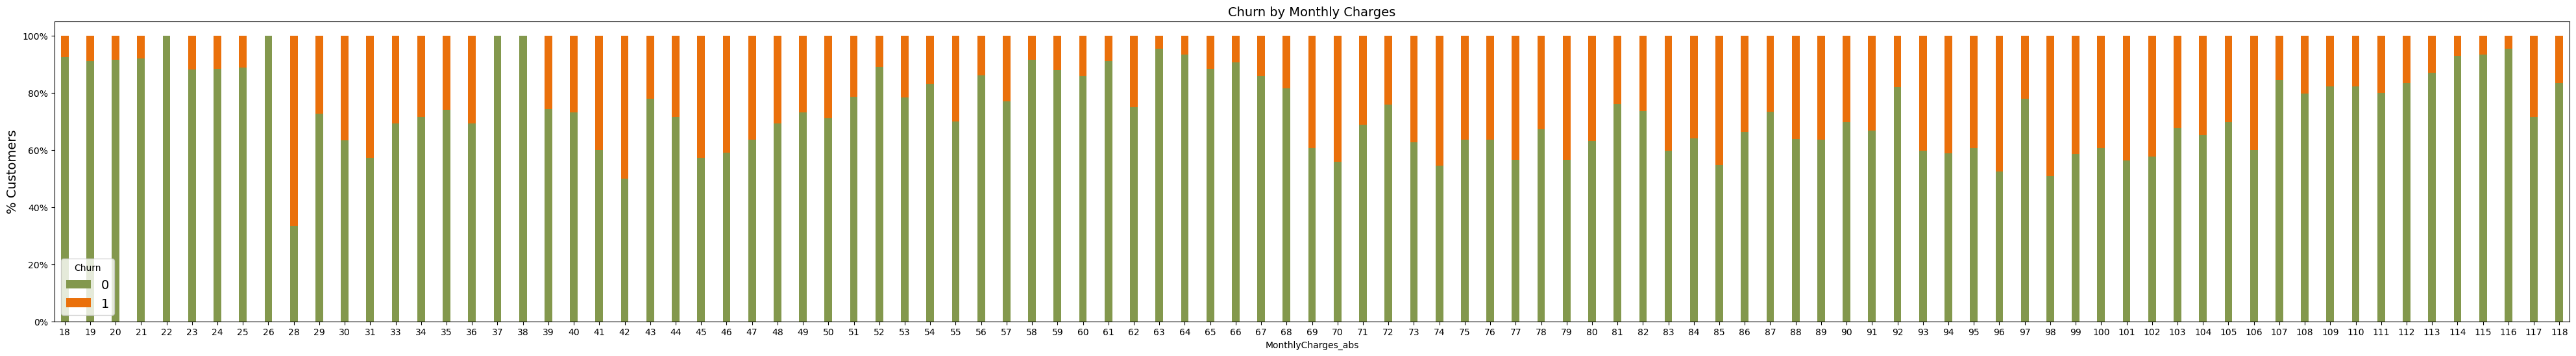

In [369]:
colors = ['#83984d','#ea700b']
monthlycharge_churn = df.groupby(['MonthlyCharges_abs','Churn']).size().unstack()

monthlycharge_churn
ax = (monthlycharge_churn.T*100.0 / monthlycharge_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (50,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Monthly Charges',size = 14)



<Axes: xlabel='MonthlyCharges_abs'>

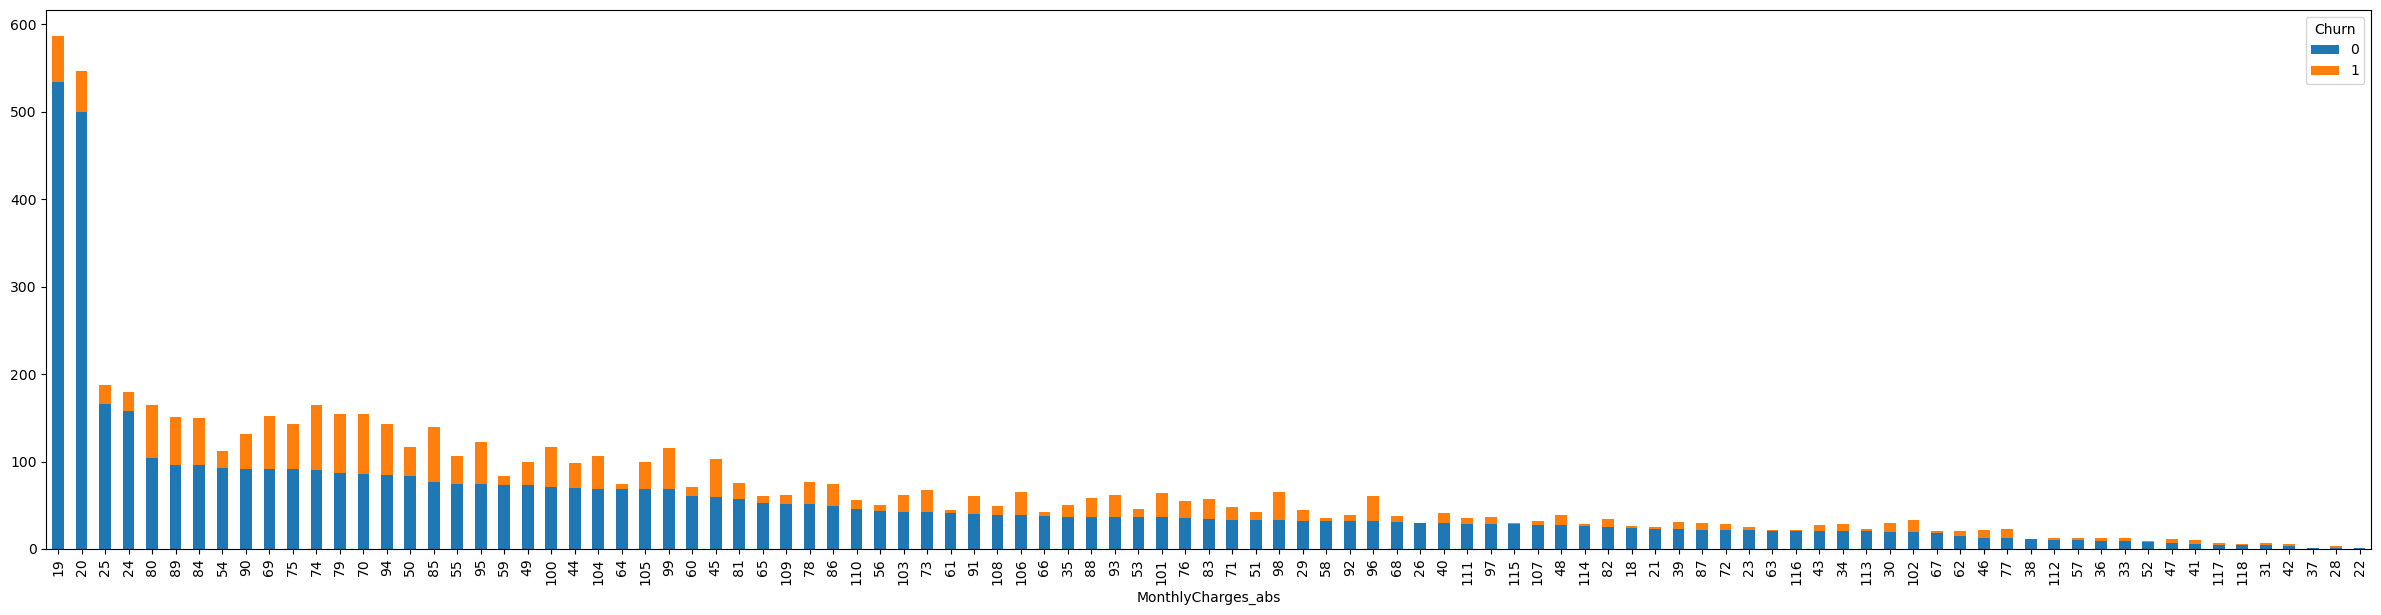

In [377]:
monthlycharge_churn = df.groupby(['MonthlyCharges_abs','Churn']).size().unstack()
monthlycharge_churn = monthlycharge_churn.sort_values(by = 0, ascending = False)


monthlycharge_churn.plot(kind = 'bar', stacked = True, figsize = (30,7))
plt.title("Churn rate vs Monthly charges")



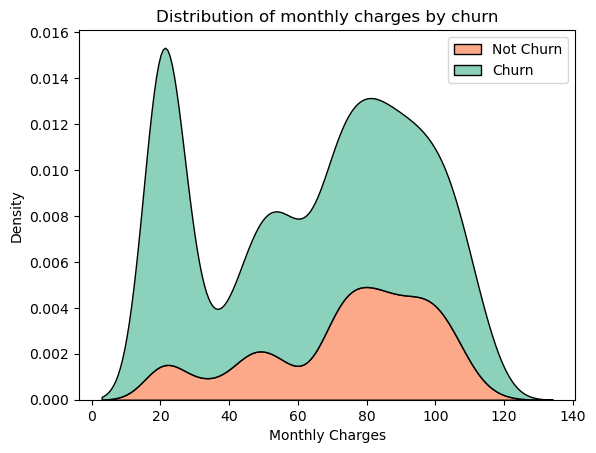

In [397]:

# CHURN OF CUSTOMERS AS PER MONTHLY CHARGES


ax = sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", multiple="stack", palette = 'Set2')
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.show()




# The lowest churn rate is when the monthly price is 19-20
# Churn rates are quite high when the prices average at 50-79
# Higher number of customers churn when monthly charges are high

In [398]:
df["TotalCharges_abs"] = df["TotalCharges"].astype(int)

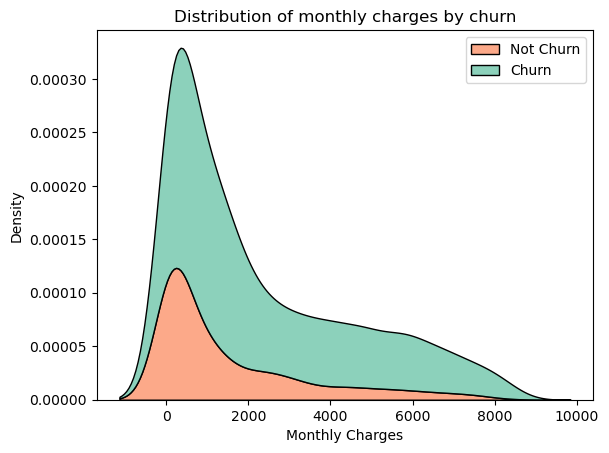

In [403]:
totalcharge_churn = df.groupby(['TotalCharges_abs','Churn']).size().unstack()
totalcharge_churn = totalcharge_churn.sort_values(by = 0, ascending = False)


ax = sns.kdeplot(data=df, x="TotalCharges", hue="Churn", multiple="stack", palette = 'Set2')
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.show()

In [ ]:
# CHURN OF CUSTOMERS AS PER MONTHLY CHARGES


ax = sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", multiple="stack", palette = 'Set2')
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.show()


# The churn is higher when the total charges is lower, but its also because the number of customers are also very high
# in the lower range

In [405]:
# DROPPING THE ABSOLUTE VALUES COLUMN

df = df.drop(columns= ['TotalCharges_abs','MonthlyCharges_abs'], axis = 1)

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_19062/1350921300.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'crest')


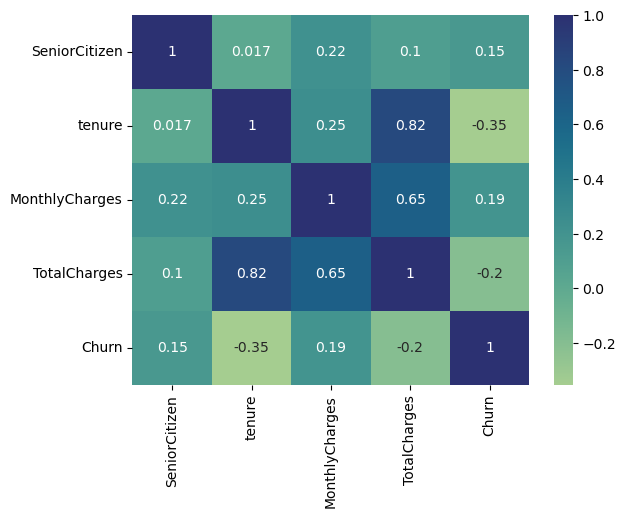

In [410]:
# CORRELATION FOR THE NUMERIC COLUMNS


sns.heatmap(df.corr(), annot = True, cmap = 'crest')
plt.show()


# Senior Citizen and Monthly charges have some correlation with churn

In [443]:
# LABEL ENCODING DATA

# CONVERTING ALL THE CATEGORICAL COLUMNS IN NUMERIC BY LABEL ENCODING

from sklearn.preprocessing import LabelEncoder

cate = []

le = LabelEncoder()

for cat in df.columns:
    if df[cat].dtype == "object":
        le.fit(df[cat])
        df[cat] = le.transform(df[cat])

In [445]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


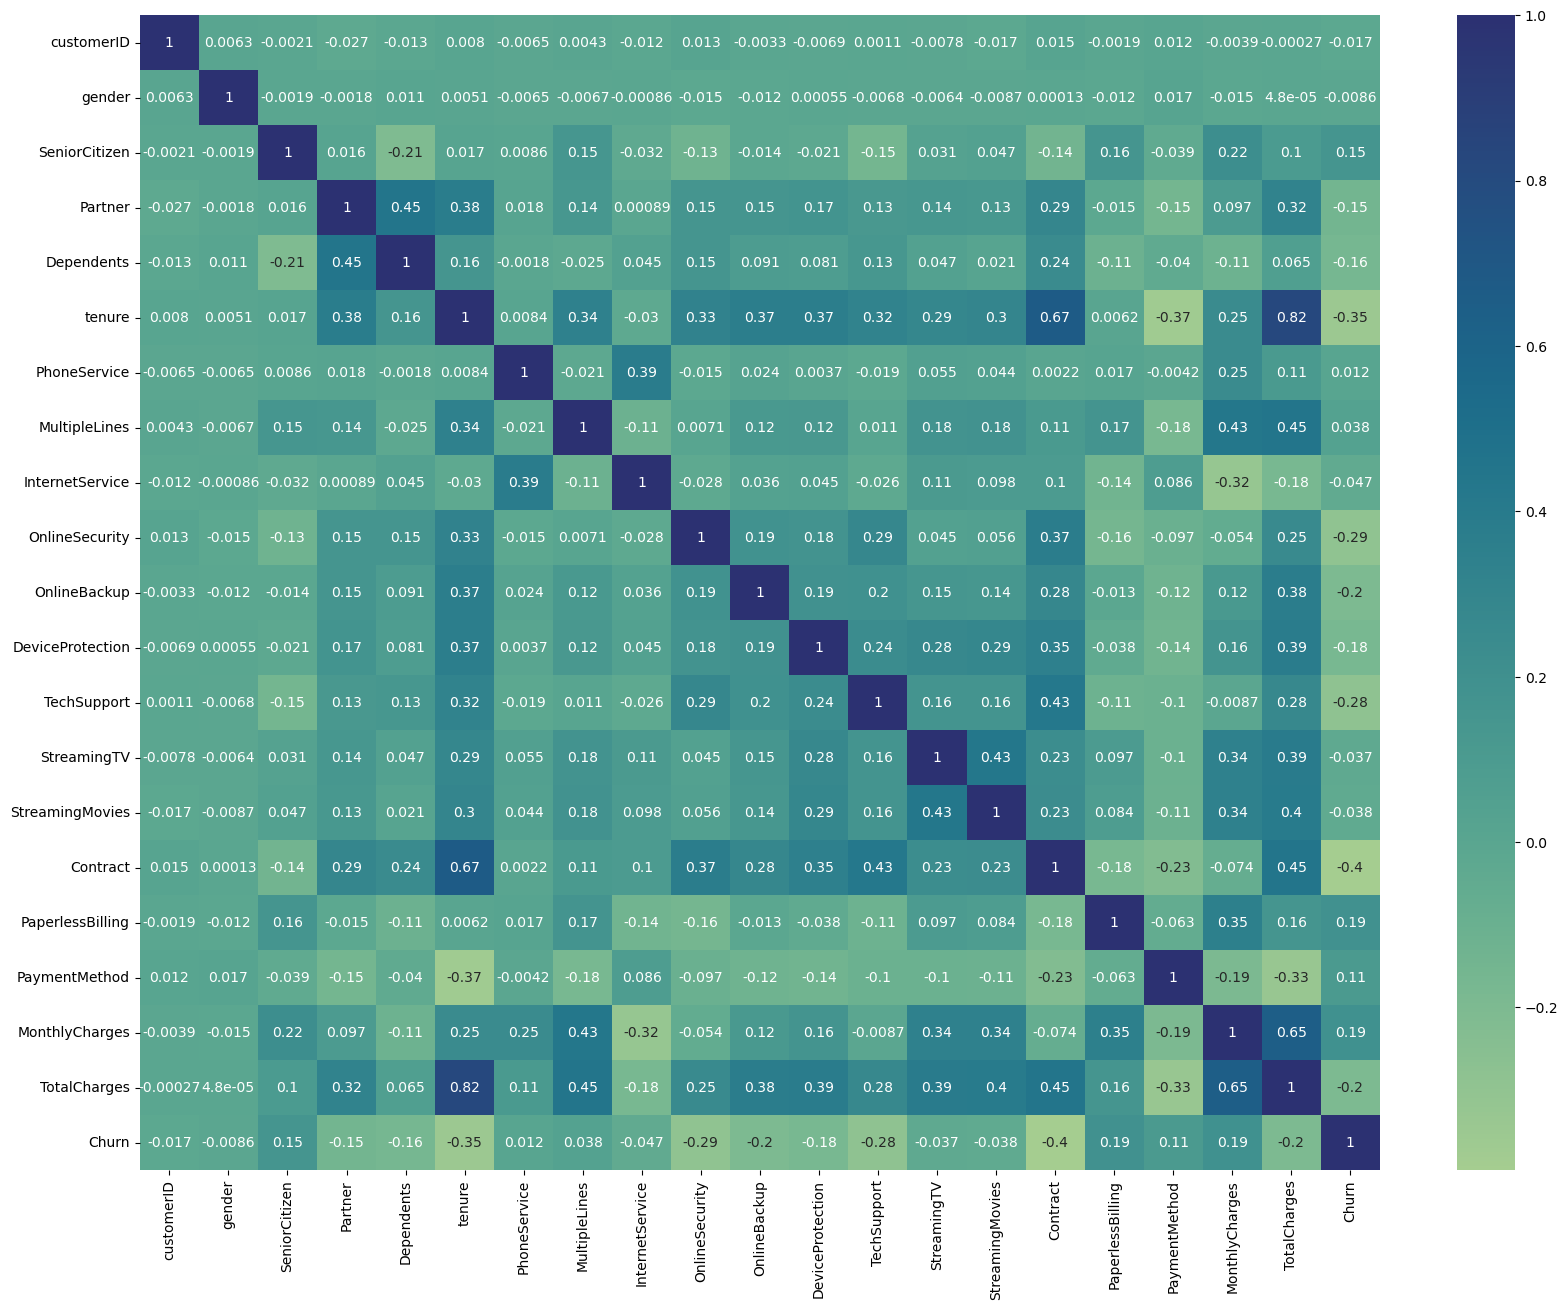

In [449]:
# CORRELATION FOR all COLUMNS

plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, cmap = 'crest')
plt.show()

In [ ]:
# Only three columns have good correlation -  Senior Citizen, PaperBilling, Monthly charges with the target column



# FEATURE SCALING

In [456]:
# Creating the model training and target variable dataframe

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [465]:
# FEATURE SCALING

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = sc.fit_transform(X)

X= pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.763277,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275
1,0.562624,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867
2,0.364101,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310
3,0.785998,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241
4,0.924595,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.689151,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.227521
7039,0.216558,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.847461
7040,0.478131,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.037809
7041,0.842658,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.033210


In [461]:
# SPLITTING DATA INTO TRAIN TEST SPLIT

In [466]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [490]:
! pip install pycaret

In [491]:

from pycaret.classification import *

In [477]:
reg = setup(data = df, target = 'Churn')

,Description,Value
0,Session id,1894
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 21)"
4,Transformed data shape,"(7043, 21)"
5,Transformed train set shape,"(4930, 21)"
6,Transformed test set shape,"(2113, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [479]:
classification = setup (df, target = 'Churn')

,Description,Value
0,Session id,2601
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 21)"
4,Transformed data shape,"(7043, 21)"
5,Transformed train set shape,"(4930, 21)"
6,Transformed test set shape,"(2113, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [485]:
# Compare different models
best_model = compare_models()

In [492]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()

In [493]:

s.setup(df, target = 'Churn', session_id = 2601)

,Description,Value
0,Session id,2601
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 21)"
4,Transformed data shape,"(7043, 21)"
5,Transformed train set shape,"(4930, 21)"
6,Transformed test set shape,"(2113, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [494]:
best = s.compare_models()

# LOGISTIC REGRESSION

In [496]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

In [503]:
from sklearn import *
print (metrics.accuracy_score(y_test, log_pred))
print(metrics.classification_report(y_test, log_pred))

0.8112136266855926
              precision    recall  f1-score   support

           0       0.86      0.90      0.87      1039
           1       0.66      0.58      0.62       370

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.80      0.81      0.81      1409



Axes(0.125,0.11;0.775x0.77)


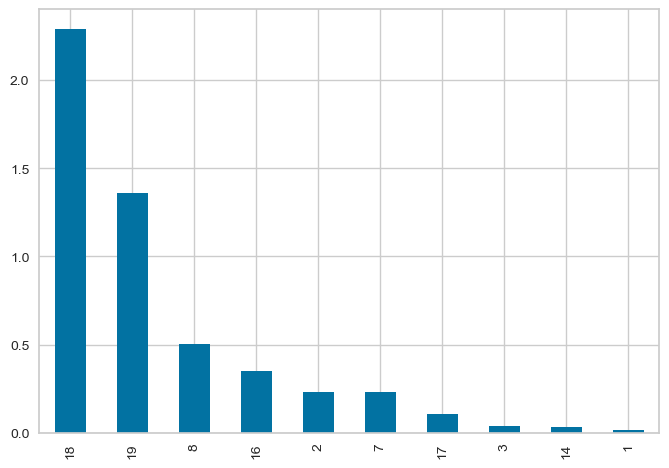

In [510]:
# To get the weights of all the variables
weights = pd.Series(log_model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))


Axes(0.125,0.11;0.775x0.77)


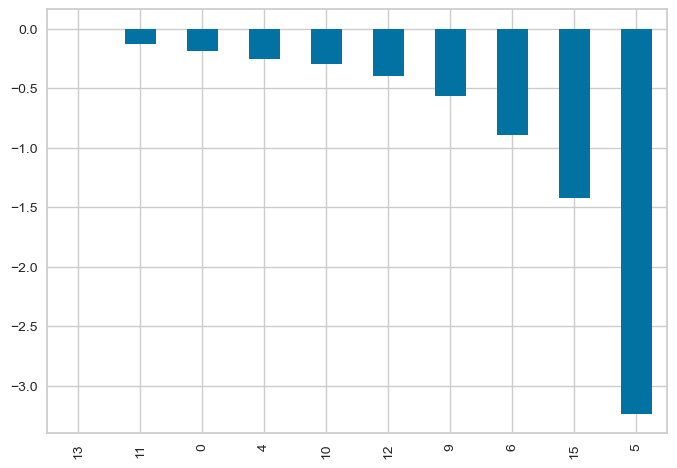

In [511]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [509]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Tenure has the most negative impact on Churn, the lower the tenure the higher the churn
# Phone service also seems to have negative correlation
# Payment method and `monthly charges have a positive correlation

In [ ]:
# RANDOM FOREST CLASSIFIER

In [513]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
print (metrics.accuracy_score(y_test, rf_pred))
print(metrics.classification_report(y_test, rf_pred))

0.8140525195173882
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1039
           1       0.70      0.51      0.59       370

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



<Axes: >

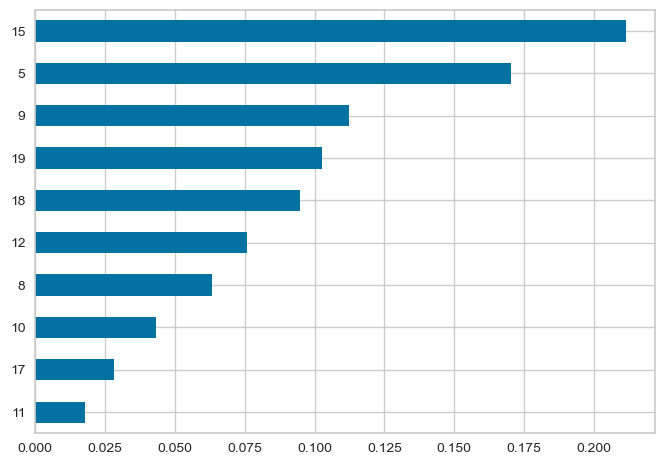

In [514]:
importances = rf_model.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [ ]:
# Contract, Tenure and Internet service are the most important features contributing to churn in random forest model

# SUPPORT VECTOR MACHINE

In [516]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear') 
svm_model.fit(X_train,y_train)
svm_preds = svm_model.predict(X_test)
metrics.accuracy_score(y_test, svm_preds)

0.8026969481902059

In [517]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,svm_preds)) 

[[929 110]
 [168 202]]


# ADABOOST

In [518]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
ada_model.fit(X_train,y_train)
ada_pred = ada_model.predict(X_test)
metrics.accuracy_score(y_test, ada_pred)

0.808374733853797

# XG BOOST

In [519]:
# XG BOOST
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)
metrics.accuracy_score(y_test, xg_pred)



0.794180269694819

In [ ]:
# FROM ALL THE MODELS, RANDOM FOREST CLASSIFIER SERVED AS THE BEST MODEL